In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
import warnings
warnings.filterwarnings('ignore')

**Reading the file in pandas dataframe**

In [2]:
df=pd.read_csv('Fraud.csv')

In [3]:
df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0


In [4]:
df.shape

(6362620, 11)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [6]:
df.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [7]:
df.describe(include='all')

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6362620,6.362620e+06,6362620,6.362620e+06,6.362620e+06,6362620,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
unique,NaN,5,NaN,6353307,NaN,NaN,2722362,NaN,NaN,NaN,NaN
top,NaN,CASH_OUT,NaN,C1902386530,NaN,NaN,C1286084959,NaN,NaN,NaN,NaN
freq,NaN,2237500,NaN,3,NaN,NaN,113,NaN,NaN,NaN,NaN
mean,2.433972e+02,NaN,1.798619e+05,NaN,8.338831e+05,8.551137e+05,NaN,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,NaN,6.038582e+05,NaN,2.888243e+06,2.924049e+06,NaN,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,NaN,0.000000e+00,NaN,0.000000e+00,0.000000e+00,NaN,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,NaN,1.338957e+04,NaN,0.000000e+00,0.000000e+00,NaN,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,NaN,7.487194e+04,NaN,1.420800e+04,0.000000e+00,NaN,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,NaN,2.087215e+05,NaN,1.073152e+05,1.442584e+05,NaN,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00


In [8]:
df.duplicated().sum()

0

**From this we came to know that there are no duplicate elements in the dataframe**

# Data Cleaning and visualization

In [9]:
df.isna().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

 **Hence there are  no any null values, Now we can perform Analysis based on data**

In [10]:
df.isFraud.value_counts()/df.shape[0]

0    0.998709
1    0.001291
Name: isFraud, dtype: float64

In [53]:
fraud_df=df.isFraud.value_counts()

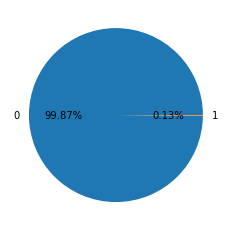

In [12]:
plt.pie(fraud_df,labels=fraud_df.keys(),autopct='%.2f%%');

**We can see that the fraud transactions are upto 0.13%.Data is highly imbalanced**

In [13]:
df.groupby('isFraud')['type'].value_counts()

isFraud  type    
0        CASH_OUT    2233384
         PAYMENT     2151495
         CASH_IN     1399284
         TRANSFER     528812
         DEBIT         41432
1        CASH_OUT       4116
         TRANSFER       4097
Name: type, dtype: int64

In [14]:
df.type.value_counts()

CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: type, dtype: int64

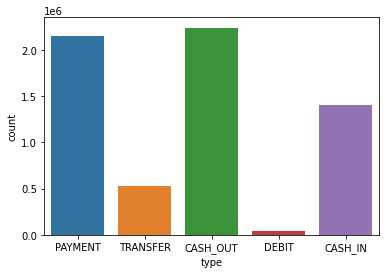

In [15]:
sns.countplot(df.type);

**Only fraud data is shown as below**

In [16]:
fraud=df[df['isFraud']==1]
fraud

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2,1,TRANSFER,181.00,C1305486145,181.00,0.0,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.0,C38997010,21182.00,0.00,1,0
251,1,TRANSFER,2806.00,C1420196421,2806.00,0.0,C972765878,0.00,0.00,1,0
252,1,CASH_OUT,2806.00,C2101527076,2806.00,0.0,C1007251739,26202.00,0.00,1,0
680,1,TRANSFER,20128.00,C137533655,20128.00,0.0,C1848415041,0.00,0.00,1,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.0,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.0,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.0,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.0,C2080388513,0.00,0.00,1,0


In [17]:
fraud.type.value_counts()

CASH_OUT    4116
TRANSFER    4097
Name: type, dtype: int64

**We can observe that,fraud are done in cashout and transfer type**

In [18]:
fraud.newbalanceOrig.value_counts()

0.00           8053
17316255.05       3
10399045.08       3
19585040.37       3
4953893.08        2
               ... 
34892193.09       1
1975271.77        1
11975271.77       1
1653144.10        1
29585040.37       1
Name: newbalanceOrig, Length: 145, dtype: int64

In [19]:
fraud.newbalanceOrig.value_counts()[0]/fraud.shape[0]*100

98.05186898818945

**98.05 % 0f frauds transactions have new balance become 0**

In [20]:
#To get total number of unique values in respective columns
fraud.nunique()

step               741
type                 2
amount            3977
nameOrig          8213
oldbalanceOrg     4094
newbalanceOrig     145
nameDest          8169
oldbalanceDest    2863
newbalanceDest    4067
isFraud              1
isFlaggedFraud       2
dtype: int64

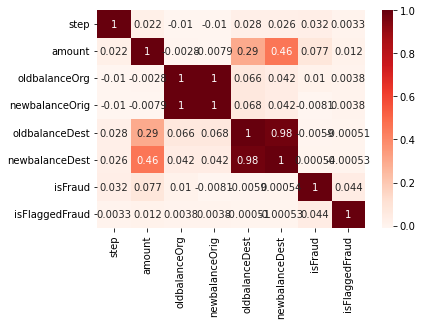

In [21]:
sns.heatmap(df.corr(),annot=True,cmap='Reds');

**from the above graph,We can observe that there is multi-collinearity between oldbalanceOrg and newbalanceOrig , oldbalanceDest and newbalanceDest.so we should remove one of them column from these multi-collinearty columns **

In [22]:
df.drop(columns=['nameOrig','nameDest','isFlaggedFraud','oldbalanceOrg','newbalanceDest'],inplace=True)

**Feature Engineering**

In [23]:
df=pd.get_dummies(df,columns=['type'])

In [24]:
df

,step,amount,newbalanceOrig,oldbalanceDest,isFraud,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,1,9839.64,160296.36,0.00,0,0,0,0,1,0
1,1,1864.28,19384.72,0.00,0,0,0,0,1,0
2,1,181.00,0.00,0.00,1,0,0,0,0,1
3,1,181.00,0.00,21182.00,1,0,1,0,0,0
4,1,11668.14,29885.86,0.00,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...
6362615,743,339682.13,0.00,0.00,1,0,1,0,0,0
6362616,743,6311409.28,0.00,0.00,1,0,0,0,0,1
6362617,743,6311409.28,0.00,68488.84,1,0,1,0,0,0
6362618,743,850002.52,0.00,0.00,1,0,0,0,0,1


<AxesSubplot:>

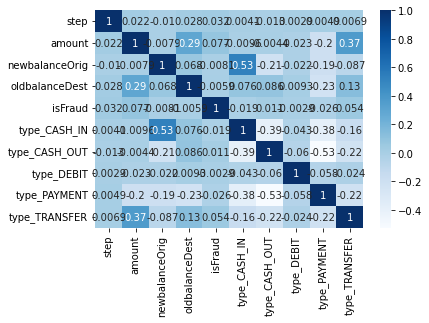

In [25]:
sns.heatmap(df.corr(),annot=True,cmap='Blues')

**classifying ;dependent variable(y)=response variable**
 
 **independent variables(X)=predictor variable =Feature**

In [26]:
X=df.drop(columns=['isFraud'])
y=df['isFraud']

# Logistic Regression model

In [54]:
#scalind data
from sklearn.preprocessing import MinMaxScaler

In [28]:
scaler=MinMaxScaler()
X_scaled=scaler.fit_transform(X)

**TRAINING AND TESTING OF DATA**

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
X_train,X_test,y_train,y_test=train_test_split(X_scaled,y,test_size=0.2,random_state=567)

**Model Fitting**

In [31]:
from sklearn.linear_model import LogisticRegression

In [32]:
reg=LogisticRegression()
reg.fit(X_train,y_train)
y_pred=reg.predict(X_test)

# PERFORMANCE METRICS

In [33]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report,f1_score,recall_score,precision_score

In [34]:
confusion_matrix(y_test,y_pred)

array([[1270870,       3],
       [   1643,       8]], dtype=int64)

In [35]:
print("Accuracy is",accuracy_score(y_test,y_pred))
print("Precision is",precision_score(y_test,y_pred))
print("Recall is",recall_score(y_test,y_pred))

Accuracy is 0.9987065076965149
Precision is 0.7272727272727273
Recall is 0.004845548152634767


In [36]:
z=classification_report(y_test,y_pred)
print(z)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270873
           1       0.73      0.00      0.01      1651

    accuracy                           1.00   1272524
   macro avg       0.86      0.50      0.50   1272524
weighted avg       1.00      1.00      1.00   1272524



# RANDOM FOREST

In [37]:
X_train1,X_test1,y_train1,y_test1=train_test_split(X,y,test_size=0.20,random_state=567)

In [38]:
from sklearn.ensemble import RandomForestClassifier

In [39]:
rfc=RandomForestClassifier()

In [40]:
rfc.fit(X_train1,y_train1)

RandomForestClassifier()

In [41]:
y_pred=rfc.predict(X_test1)

In [42]:
print("Accuracy is",accuracy_score(y_test1,y_pred))
print("Precision is",precision_score(y_test1,y_pred))
print("Recall is",recall_score(y_test1,y_pred))

Accuracy is 0.9991984434085329
Precision is 0.852513966480447
Recall is 0.46214415505754086


In [46]:
from imblearn.over_sampling import SMOTE

ModuleNotFoundError: No module named 'imblearn'

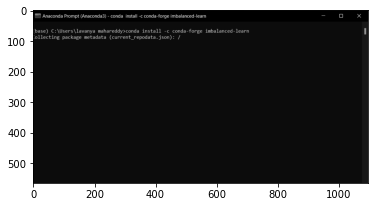

In [51]:
#installation problem
import cv2
img_array=cv2.imread('imblearn installation problem.png',cv2.IMREAD_GRAYSCALE)
plt.imshow(img_array,cmap='gray')

**Because data is highly imbalanced ,recall is very low therefore we use SMOTE.But there is a issue with my laptop in installing SMOTE.So I am just writing the necessary code for increasing recall**

from imblearn.over_sampling import SMOTE

ovr=SMOTE()

x_smote,y_smote=ovr.fit_resample(x,y)

**Logistic Regression on SMOTEED data.**
x_train1,x_test1,y_train1,y_test1=train_test_split(x_smote,y_smote,test_size=0.10,random_state=123)

logreg=LogisticRegression()

logreg.fit(x_train1,y_train1)

y_pred1=logreg.predict(x_test1)

print("Accuracy:",accuracy_score(y_test1, y_pred1))

print("Precision:",precision_score(y_test1, y_pred1))

print("Recall:",recall_score(y_test1, y_pred1))

**After this we get a decent precision,Accuracy,Recall**

From confusion matrix ,we can see our model predict some of the non fraudulent transactions as fraudulent but also do a much better job than the current algorithm at tagging fraudulent transactions as fraudulent. Accuracy doesn't say much about performance since the data is unbalanced and have a lot more positive cases (non fraudulent transactions) than negative cases (fraudulent transactions).


In [48]:
from sklearn import metrics
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270873
           1       0.85      0.46      0.60      1651

    accuracy                           1.00   1272524
   macro avg       0.93      0.73      0.80   1272524
weighted avg       1.00      1.00      1.00   1272524



<AxesSubplot:>

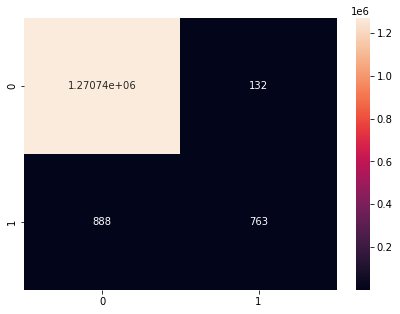

In [49]:
cm=metrics.confusion_matrix(y_test,y_pred,labels=[0,1])
df_cm=pd.DataFrame(cm,index=[i for i in ["0","1"]],
                  columns=[i for i in ["0","1"]])
plt.figure(figsize=(7,5))
sns.heatmap(df_cm,annot=True,fmt="g")

**Prevention should be adopted while company update its infrastructure are:**

*A)Once you have hired sincere employees and have internal control policies in place, you need to deploy methods to monitor your employees regularly to see how well they cooperate to the various policies and procedures of the organization.*

*B)Another productive approach to fraud prevention is to provide annual training to employees on various topics related to fraud prevention and detection. This training will not only help employees to understand the various frauds that can happen in an organization, but it will also make your employees stand up against a deceit or scam when it happens in their presence*

*C)You can also set up an anonymous reporting system in your organization, where one can report any violations of policies and procedures that they encounter.*

*D)Cash transactions are more prone to fraud and theft than digital transactions.Usage of cash makes it difficult to monitor internal theft. Replacing traditional cash-based transaction with mobile transcation  not only restricts internal theft and fraud, but it will also monitor employees’ behavior and activities in depth*

**Assuming these actions have been implemented,if we run the model again then we can see that,fraud transactions count has decreased a lot.**

